In [1]:
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
nltk.downloader.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/j.chao/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
finwiz_url = 'https://finviz.com/quote.ashx?t='
news_tables = {}
tickers = ['AAPL', 'NVDA', 'AMAT','DVN','APA','MS','QCOM','MSFT','PYPL','AMD']
for ticker in tickers:
    url = finwiz_url + ticker
    req = Request(url=url,headers={'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; \
    WOW64; rv:20.0) Gecko/20100101 Firefox/20.0'}) 
    response = urlopen(req)    
    # Read the contents of the file into 'html'
    html = BeautifulSoup(response)
    # Find 'news-table' in the Soup and load it into 'news_table'
    news_table = html.find(id='news-table')
    # Add the table to our dictionary
    news_tables[ticker] = news_table

In [3]:
parsed_news = []

for file_name, news_table in news_tables.items():
    for x in news_table.findAll('tr'):
        # read the text from each tr tag into text
        # get text from a only
        text = x.get_text() 
        # splite text in the td tag into a list 
        date_scrape = x.td.text.split()
        # if the length of 'date_scrape' is 1, load 'time' as the only element
        if len(date_scrape) == 1:
            time = date_scrape[0]   
        # else load 'date' as the 1st element and 'time' as the second    
        else:
            date = date_scrape[0]
            time = date_scrape[1]
        # Extract the ticker from the file name, get the string up to the 1st '_'  
        ticker = file_name.split('_')[0]
        # Append ticker, date, time and headline as a list to the 'parsed_news' list
        parsed_news.append([ticker, date, time, text])
        
parsed_news

[['AAPL',
  'Dec-08-22',
  '01:51PM',
  "Dec-08-22 01:51PMChina's COVID Policy Swayed by Foxconn Letter Investopedia"],
 ['AAPL',
  'Dec-08-22',
  '11:46AM',
  "11:46AMHere's How Apple's Crucial Partner Influenced China's Relaxation Of Covid Policies Benzinga"],
 ['AAPL',
  'Dec-08-22',
  '11:38AM',
  "11:38AMIndia Draws Incremental Investment From This Apple Supplier At China's Cost Benzinga"],
 ['AAPL',
  'Dec-08-22',
  '11:30AM',
  '11:30AM3D Systems (DDD) Up 12.7% Since Last Earnings Report: Can It Continue? Zacks'],
 ['AAPL',
  'Dec-08-22',
  '11:29AM',
  '11:29AMFoxconn, which makes iPhones, reportedly urged Chinese government to loosen COVID restrictions MarketWatch'],
 ['AAPL', 'Dec-08-22', '09:19AM', '\n09:19AM\nLoading…\n'],
 ['AAPL',
  'Dec-08-22',
  '09:19AM',
  '09:19AMApple Tightens Security on  Messaging and iCloud Barrons.com'],
 ['AAPL',
  'Dec-08-22',
  '09:12AM',
  '09:12AMPolestars Idea for the Car Industry: Sell Cheat Codes Barrons.com'],
 ['AAPL',
  'Dec-08-22',
 

In [4]:
# Instantiate the sentiment intensity analyzer
vader = SentimentIntensityAnalyzer()

# Set column names
columns = ['ticker', 'date', 'time', 'headline']

# Convert the parsed_news list into a DataFrame called 'parsed_and_scored_news'
parsed_and_scored_news = pd.DataFrame(parsed_news, columns=columns)

# Iterate through the headlines and get the polarity scores using vader
scores = parsed_and_scored_news['headline'].apply(vader.polarity_scores).tolist()

# Convert the 'scores' list of dicts into a DataFrame
scores_df = pd.DataFrame(scores)

# Join the DataFrames of the news and the list of dicts
parsed_and_scored_news = parsed_and_scored_news.join(scores_df, rsuffix='_right')

# Convert the date column from string to datetime
parsed_and_scored_news['date'] = pd.to_datetime(parsed_and_scored_news.date).dt.date

In [5]:
sent = parsed_and_scored_news[["ticker","date","compound"]]
sent_aapl = sent[sent["ticker"] == 'AAPL']
sent_nvda = sent[sent["ticker"] == 'NVDA']
sent_amat = sent[sent["ticker"] == 'AMAT']
sent_dvn = sent[sent["ticker"] == 'DVN']
sent_ms = sent[sent["ticker"] == 'MS']
sent_apa = sent[sent["ticker"] == 'APA']
sent_qcom = sent[sent["ticker"] == 'QCOM']
sent_msft = sent[sent["ticker"] == 'MSFT']
sent_pypl = sent[sent["ticker"] == 'PYPL']
sent_amd = sent[sent["ticker"] == 'AMD']

In [6]:
sent_aapl

,ticker,date,compound
0,AAPL,2022-12-08,0.0000
1,AAPL,2022-12-08,0.5267
2,AAPL,2022-12-08,0.0000
3,AAPL,2022-12-08,0.0000
4,AAPL,2022-12-08,0.0000
...,...,...,...
98,AAPL,2022-12-05,-0.5267
99,AAPL,2022-12-05,-0.2263
100,AAPL,2022-12-05,-0.4019
101,AAPL,2022-12-05,-0.4019


In [7]:
sent_nvda

,ticker,date,compound
103,NVDA,2022-12-08,0.1027
104,NVDA,2022-12-08,-0.7269
105,NVDA,2022-12-07,0.5423
106,NVDA,2022-12-07,-0.4404
107,NVDA,2022-12-07,-0.7430
...,...,...,...
201,NVDA,2022-11-17,-0.4404
202,NVDA,2022-11-17,0.0772
203,NVDA,2022-11-17,0.0000
204,NVDA,2022-11-17,-0.3182


In [8]:
sent_amd

,ticker,date,compound
927,AMD,2022-12-08,0.4939
928,AMD,2022-12-08,-0.4404
929,AMD,2022-12-08,-0.4404
930,AMD,2022-12-08,-0.7269
931,AMD,2022-12-07,-0.4404
...,...,...,...
1025,AMD,2022-11-14,0.3291
1026,AMD,2022-11-14,0.0000
1027,AMD,2022-11-14,0.0000
1028,AMD,2022-11-14,0.5994


<AxesSubplot:title={'center':'Sentiment scores'}, xlabel='date'>

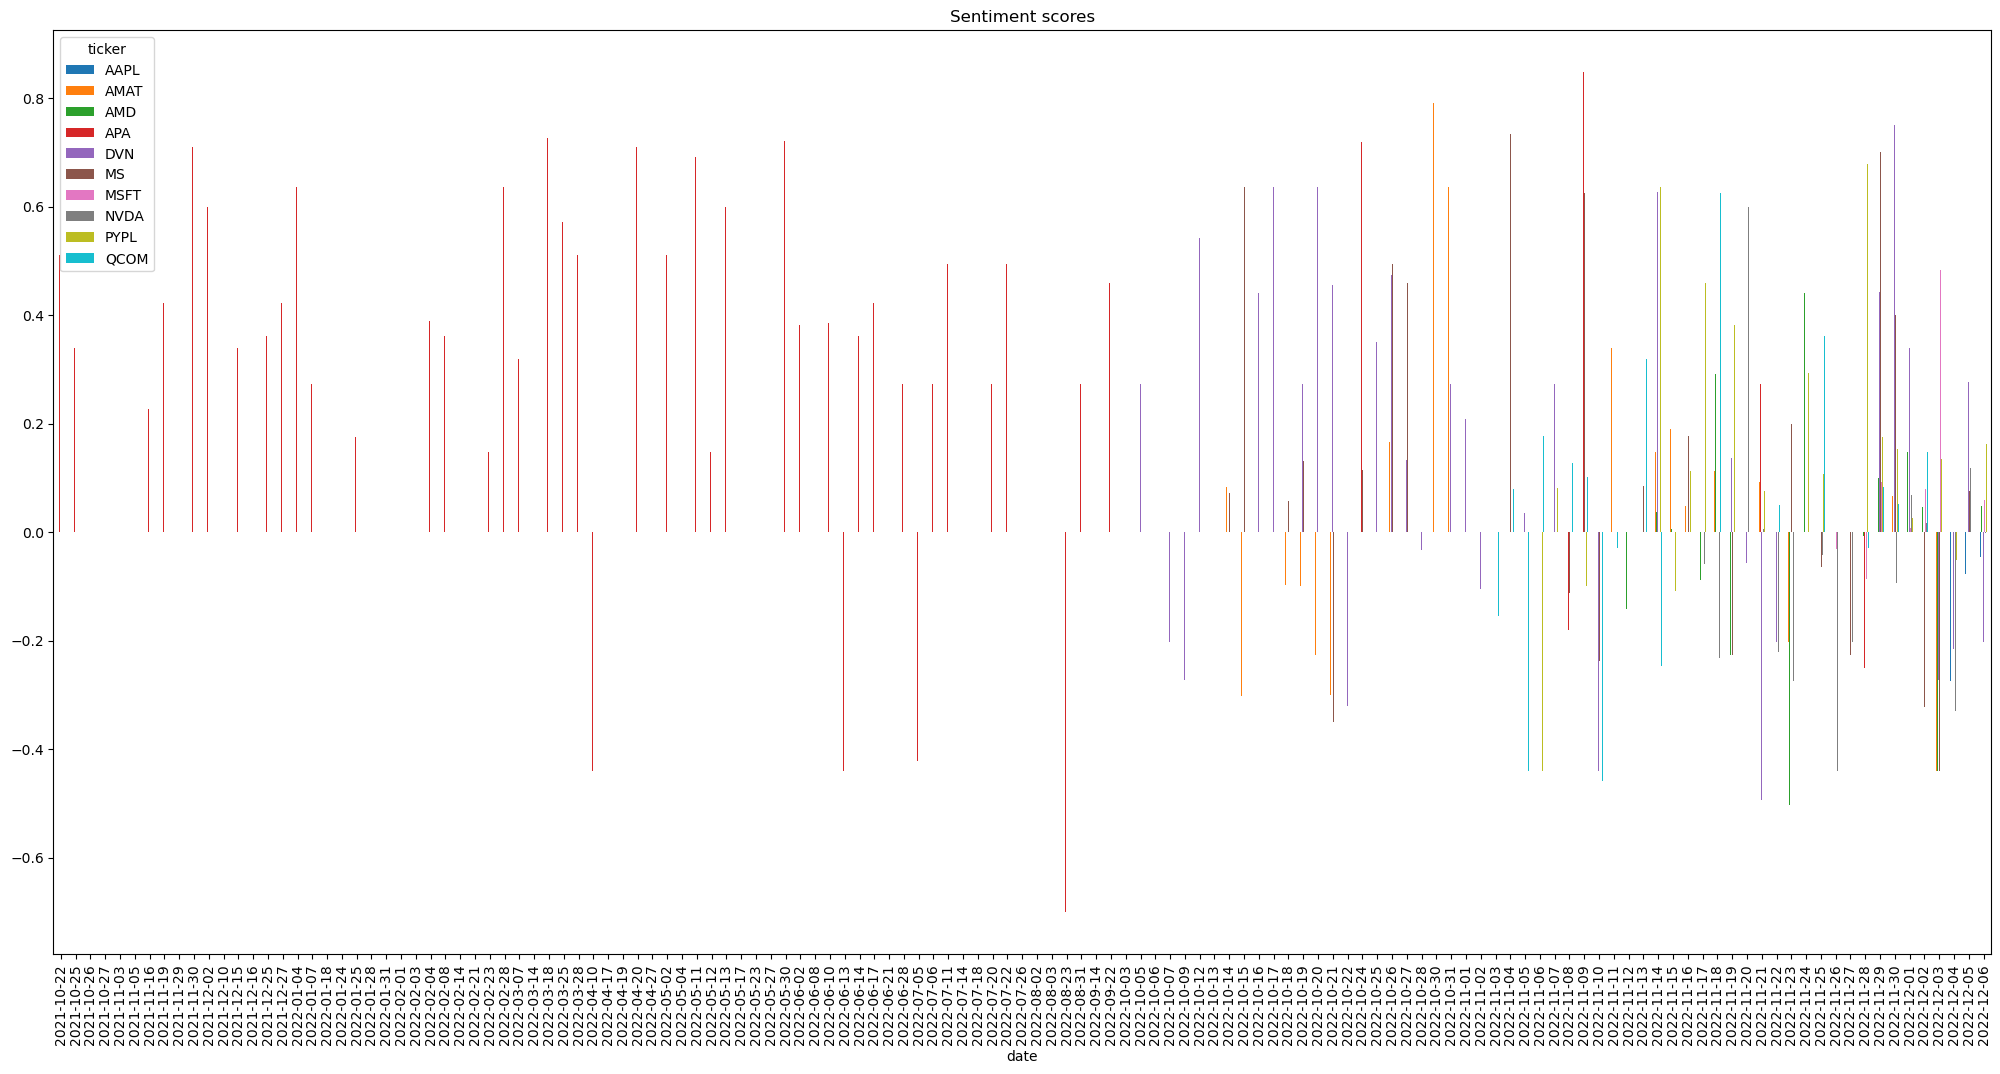

In [11]:
plt.rcParams['figure.figsize'] = [25,12]

mean_scores = parsed_and_scored_news.groupby(['ticker','date']).mean()
mean_scores = mean_scores.unstack()
mean_scores = mean_scores.xs('compound', axis="columns").transpose()
mean_scores.plot(kind = 'bar',title = 'Sentiment scores')
#plt.grid()

In [11]:
#Construct average sentiment on each day
from datetime import datetime as dt
from pandas_datareader import data
start_date = "2022-11-01"
end_date = "2022-12-05"

aapl_data = data.DataReader("AAPL","yahoo",start_date,end_date)
aapl = pd.DataFrame(data=aapl_data['Close'])
aapl['log_ret'] = np.log(aapl['Close'].shift(-1)) - np.log(aapl['Close'])




prev_d = dt.fromisoformat(start_date).date()
avg_sentiment = []
for date in aapl.index.values:
    d = pd.to_datetime(date).date()
    #tesla.loc[tesla.index == date] = np.mean(em.loc[(em.Date <= d) & (em.Date > prev_d)].Sentiment)
    avg = np.mean(sent_aapl.loc[(sent_aapl.date <= d) & (sent_aapl.date > prev_d)].compound)
    if np.isnan(avg):
        avg_sentiment.append(0)
    else:
        avg_sentiment.append(avg)
    prev_d = d
aapl['sentiment'] = avg_sentiment

#Drop final row
aapl = aapl.iloc[:-1,]
print(aapl)

                 Close   log_ret  sentiment
Date                                       
2022-11-01  150.649994 -0.038019   0.000000
2022-11-02  145.029999 -0.043330   0.000000
2022-11-03  138.880005 -0.003607   0.000000
2022-11-04  138.380005  0.003895   0.000000
2022-11-07  138.919998  0.004166   0.000000
2022-11-08  139.500000 -0.033753   0.000000
2022-11-09  134.869995  0.085236   0.000000
2022-11-10  146.869995  0.019085   0.000000
2022-11-11  149.699997 -0.009531   0.000000
2022-11-14  148.279999  0.011800   0.000000
2022-11-15  150.039993 -0.008366   0.000000
2022-11-16  148.789993  0.012888   0.000000
2022-11-17  150.720001  0.003775   0.000000
2022-11-18  151.289993 -0.021919   0.000000
2022-11-21  148.009995  0.014555   0.000000
2022-11-22  150.179993  0.005909   0.000000
2022-11-23  151.070007 -0.019788   0.000000
2022-11-25  148.110001 -0.026615   0.000000
2022-11-28  144.220001 -0.021375   0.000000
2022-11-29  141.169998  0.047450   0.000000
2022-11-30  148.029999  0.001890

In [12]:
aapl_mu = aapl['sentiment'].mean();aapl_mu

-0.009055599472990778

In [52]:
aapl_corr = aapl['log_ret'].corr(aapl['sentiment']);aapl_corr

0.011210790173907937

In [14]:
#Construct average sentiment on each day

nvda_data = data.DataReader("NVDA","yahoo",start_date,end_date)
nvda = pd.DataFrame(data=nvda_data['Close'])
nvda['log_ret'] = np.log(nvda['Close'].shift(-1)) - np.log(nvda['Close'])




prev_d = dt.fromisoformat(start_date).date()
avg_sentiment = []
for date in nvda.index.values:
    d = pd.to_datetime(date).date()
    #tesla.loc[tesla.index == date] = np.mean(em.loc[(em.Date <= d) & (em.Date > prev_d)].Sentiment)
    avg = np.mean(sent_nvda.loc[(sent_nvda.date <= d) & (sent_nvda.date > prev_d)].compound)
    if np.isnan(avg):
        avg_sentiment.append(0)
    else:
        avg_sentiment.append(avg)
    prev_d = d
nvda['sentiment'] = avg_sentiment

#Drop final row
nvda = nvda.iloc[:-1,]
print(nvda)

                 Close   log_ret  sentiment
Date                                       
2022-11-01  135.429993 -0.024215   0.000000
2022-11-02  132.190002  0.015165   0.000000
2022-11-03  134.210007  0.053318   0.000000
2022-11-04  141.559998  0.010191   0.000000
2022-11-07  143.009995  0.020829   0.000000
2022-11-08  146.020004 -0.058231   0.000000
2022-11-09  137.759995  0.133912   0.000000
2022-11-10  157.500000  0.035980   0.000000
2022-11-11  163.270004 -0.001962   0.000000
2022-11-14  162.949997  0.022512   0.000000
2022-11-15  166.660004 -0.046423   0.000000
2022-11-16  159.100006 -0.014753   0.000000
2022-11-17  156.770004 -0.017243  -0.019169
2022-11-18  154.089996 -0.005988  -0.231240
2022-11-21  153.169998  0.045998   0.070589
2022-11-22  160.380005  0.029550  -0.220200
2022-11-23  165.190002 -0.015188  -0.274100
2022-11-25  162.699997 -0.027606  -0.087189
2022-11-28  158.270004 -0.011950  -0.084812
2022-11-29  156.389999  0.078906   0.405180
2022-11-30  169.229996  0.012450

In [15]:
nvda_mu = nvda['sentiment'].mean();nvda_mu

-0.01962742494824017

In [53]:
nvda_corr = nvda['log_ret'].corr(nvda['sentiment']);nvda_corr

0.3300844765536668

In [17]:
amat_data = data.DataReader("AMAT","yahoo",start_date,end_date)
amat= pd.DataFrame(data=amat_data['Close'])
amat['log_ret'] = np.log(amat['Close'].shift(-1)) - np.log(amat['Close'])




prev_d = dt.fromisoformat(start_date).date()
avg_sentiment = []
for date in amat.index.values:
    d = pd.to_datetime(date).date()
    avg = np.mean(sent_amat.loc[(sent_amat.date <= d) & (sent_amat.date > prev_d)].compound)
    if np.isnan(avg):
        avg_sentiment.append(0)
    else:
        avg_sentiment.append(avg)
    prev_d = d
amat['sentiment'] = avg_sentiment

#Drop final row
amat = amat.iloc[:-1,]
print(amat)

                 Close   log_ret  sentiment
Date                                       
2022-11-01   89.790001 -0.022868   0.000000
2022-11-02   87.760002 -0.016776   0.000000
2022-11-03   86.300003  0.060693   0.152933
2022-11-04   91.699997  0.035776   0.000000
2022-11-07   95.040001  0.025144  -0.361200
2022-11-08   97.459999 -0.032113   0.000000
2022-11-09   94.379997  0.104629   0.000000
2022-11-10  104.790001  0.053329   0.000000
2022-11-11  110.529999 -0.026773   0.340000
2022-11-14  107.610001  0.026140   0.148000
2022-11-15  110.459999 -0.058149   0.190900
2022-11-16  104.220001  0.002204   0.047850
2022-11-17  104.449997  0.002391   0.007623
2022-11-18  104.699997  0.004194   0.101190
2022-11-21  105.139999  0.017910   0.046125
2022-11-22  107.040001  0.005868   0.000000
2022-11-23  107.669998 -0.017331  -0.202300
2022-11-25  105.820000 -0.022458   0.000000
2022-11-28  103.470001 -0.002128   0.421500
2022-11-29  103.250000  0.059684   0.000000
2022-11-30  109.599998 -0.023915

In [18]:
amat_mu = amat['sentiment'].mean();amat_mu

0.035285713489409135

In [54]:
amat_corr = amat['log_ret'].corr(amat['sentiment']);amat_corr

-0.14899092120074772

In [20]:
dvn_data = data.DataReader("DVN","yahoo",start_date,end_date)
dvn= pd.DataFrame(data=dvn_data['Close'])
dvn['log_ret'] = np.log(dvn['Close'].shift(-1)) - np.log(dvn['Close'])




prev_d = dt.fromisoformat(start_date).date()
avg_sentiment = []
for date in dvn.index.values:
    d = pd.to_datetime(date).date()
    avg = np.mean(sent_dvn.loc[(sent_dvn.date <= d) & (sent_dvn.date > prev_d)].compound)
    if np.isnan(avg):
        avg_sentiment.append(0)
    else:
        avg_sentiment.append(avg)
    prev_d = d
dvn['sentiment'] = avg_sentiment

#Drop final row
dvn = dvn.iloc[:-1,]
print(dvn)

                Close   log_ret  sentiment
Date                                      
2022-11-01  77.300003 -0.136456   0.000000
2022-11-02  67.440002  0.047632  -0.105380
2022-11-03  70.730003  0.010548   0.000000
2022-11-04  71.480003  0.007804   0.000000
2022-11-07  72.040001 -0.000694   0.086025
2022-11-08  71.989998 -0.075423   0.618150
2022-11-09  66.760002  0.032713  -0.340000
2022-11-10  68.980003  0.040068  -0.440400
2022-11-11  71.800003 -0.004187   0.000000
2022-11-14  71.500000  0.029219   0.236900
2022-11-15  73.620003 -0.031460   0.000000
2022-11-16  71.339996 -0.004918   0.000000
2022-11-17  70.989998 -0.019487   0.000000
2022-11-18  69.620003 -0.035527   0.099900
2022-11-21  67.190002  0.020331  -0.126900
2022-11-22  68.570000 -0.011293  -0.202300
2022-11-23  67.800003  0.008079   0.000000
2022-11-25  68.349998 -0.026989   0.000000
2022-11-28  66.529999  0.014475   0.241288
2022-11-29  67.500000  0.014998   0.442800
2022-11-30  68.519997 -0.003509   0.750600
2022-12-01 

In [21]:
dvn_mu = dvn['sentiment'].mean();dvn_mu

0.10189923913043479

In [55]:
dvn_corr = dvn['log_ret'].corr(dvn['sentiment']);dvn_corr

-0.27883271600225296

In [23]:
ms_data = data.DataReader("MS","yahoo",start_date,end_date)
ms= pd.DataFrame(data=ms_data['Close'])
ms['log_ret'] = np.log(ms['Close'].shift(-1)) - np.log(ms['Close'])




prev_d = dt.fromisoformat(start_date).date()
avg_sentiment = []
for date in ms.index.values:
    d = pd.to_datetime(date).date()
    avg = np.mean(sent_ms.loc[(sent_ms.date <= d) & (sent_ms.date > prev_d)].compound)
    if np.isnan(avg):
        avg_sentiment.append(0)
    else:
        avg_sentiment.append(avg)
    prev_d = d
ms['sentiment'] = avg_sentiment

#Drop final row
ms = ms.iloc[:-1,]
print(ms)

                Close   log_ret  sentiment
Date                                      
2022-11-01  83.720001  0.007734   0.000000
2022-11-02  84.370003 -0.008929   0.000000
2022-11-03  83.620003  0.014602   0.212300
2022-11-04  84.849998  0.008450   0.734250
2022-11-07  85.570000 -0.003395   0.101150
2022-11-08  85.279999 -0.021692  -0.113150
2022-11-09  83.449997  0.062139   0.624900
2022-11-10  88.800003  0.022052  -0.238350
2022-11-11  90.779999 -0.010743   0.000000
2022-11-14  89.809998  0.007654   0.084000
2022-11-15  90.500000 -0.007542   0.000000
2022-11-16  89.820000 -0.009733   0.177900
2022-11-17  88.949997  0.002807   0.263350
2022-11-18  89.199997 -0.001346   0.000000
2022-11-21  89.080002  0.006601   0.059633
2022-11-22  89.669998  0.002895   0.000000
2022-11-23  89.930000  0.010838   0.159760
2022-11-25  90.910004 -0.011283  -0.077800
2022-11-28  89.889999  0.013152   0.124550
2022-11-29  91.080002  0.021614   0.700300
2022-11-30  93.070000 -0.000752   0.401000
2022-12-01 

In [24]:
ms_mu = ms['sentiment'].mean();ms_mu

0.132668033126294

In [56]:
ms_corr = ms['log_ret'].corr(ms['sentiment']);ms_corr

0.5801008803344253

In [26]:
apa_data = data.DataReader("APA","yahoo",start_date,end_date)
apa= pd.DataFrame(data=apa_data['Close'])
apa['log_ret'] = np.log(apa['Close'].shift(-1)) - np.log(apa['Close'])




prev_d = dt.fromisoformat(start_date).date()
avg_sentiment = []
for date in apa.index.values:
    d = pd.to_datetime(date).date()
    avg = np.mean(sent_apa.loc[(sent_apa.date <= d) & (sent_apa.date > prev_d)].compound)
    if np.isnan(avg):
        avg_sentiment.append(0)
    else:
        avg_sentiment.append(avg)
    prev_d = d
apa['sentiment'] = avg_sentiment

#Drop final row
apa = apa.iloc[:-1,]
print(apa)

                Close   log_ret  sentiment
Date                                      
2022-11-01  45.790001 -0.034436     0.0000
2022-11-02  44.240002  0.066669     0.0000
2022-11-03  47.290001  0.035317     0.0000
2022-11-04  48.990002  0.010356     0.0000
2022-11-07  49.500000 -0.009336     0.0000
2022-11-08  49.040001 -0.073826    -0.1806
2022-11-09  45.549999  0.031337     0.8481
2022-11-10  47.000000  0.036763     0.0000
2022-11-11  48.759998 -0.032305     0.0000
2022-11-14  47.209999  0.038031     0.0000
2022-11-15  49.040001 -0.033381     0.0000
2022-11-16  47.430000 -0.010385     0.0000
2022-11-17  46.939999 -0.012865     0.0000
2022-11-18  46.340000 -0.023361     0.0000
2022-11-21  45.270000  0.053963     0.2732
2022-11-22  47.779999 -0.021151     0.0000
2022-11-23  46.779999 -0.007510     0.0000
2022-11-25  46.430000 -0.032173     0.0000
2022-11-28  44.959999  0.035613    -0.2500
2022-11-29  46.590000  0.005565     0.0000
2022-11-30  46.849998 -0.002779     0.0000
2022-12-01 

In [27]:
apa_mu = apa['sentiment'].mean();apa_mu

0.030030434782608695

In [57]:
apa_corr = apa['log_ret'].corr(apa['sentiment']);apa_corr

0.3047385407068928

In [29]:
qcom_data = data.DataReader("QCOM","yahoo",start_date,end_date)
qcom= pd.DataFrame(data=qcom_data['Close'])
qcom['log_ret'] = np.log(qcom['Close'].shift(-1)) - np.log(qcom['Close'])




prev_d = dt.fromisoformat(start_date).date()
avg_sentiment = []
for date in qcom.index.values:
    d = pd.to_datetime(date).date()
    avg = np.mean(sent_qcom.loc[(sent_qcom.date <= d) & (sent_qcom.date > prev_d)].compound)
    if np.isnan(avg):
        avg_sentiment.append(0)
    else:
        avg_sentiment.append(avg)
    prev_d = d
qcom['sentiment'] = avg_sentiment

#Drop final row
qcom = qcom.iloc[:-1,]
print(qcom)

                 Close   log_ret  sentiment
Date                                       
2022-11-01  117.330002 -0.042037   0.000000
2022-11-02  112.500000 -0.079717  -0.083740
2022-11-03  103.879997  0.026691  -0.154082
2022-11-04  106.690002  0.031371   0.079010
2022-11-07  110.089996  0.022011  -0.185750
2022-11-08  112.540001 -0.018927   0.126700
2022-11-09  110.430000  0.088761   0.101150
2022-11-10  120.680000  0.006196  -0.458800
2022-11-11  121.430000 -0.005202  -0.029300
2022-11-14  120.800003  0.042304   0.055283
2022-11-15  126.019997 -0.042884   0.000000
2022-11-16  120.730003  0.017489  -0.047620
2022-11-17  122.860001  0.008026  -0.299700
2022-11-18  123.849998 -0.029914   0.624900
2022-11-21  120.199997  0.028298   0.113150
2022-11-22  123.650002  0.012058   0.050367
2022-11-23  125.150002 -0.013677   0.000000
2022-11-25  123.449997 -0.032185   0.361200
2022-11-28  119.540001 -0.009751  -0.029367
2022-11-29  118.379997  0.066263   0.055733
2022-11-30  126.489998  0.002527

In [30]:
qcom_mu = qcom['sentiment'].mean();qcom_mu

0.009499341238471678

In [58]:
qcom_corr = qcom['log_ret'].corr(qcom['sentiment']);qcom_corr

-0.1075785087490753

In [32]:
msft_data = data.DataReader("MSFT","yahoo",start_date,end_date)
msft = pd.DataFrame(data=msft_data['Close'])
msft['log_ret'] = np.log(msft['Close'].shift(-1)) - np.log(msft['Close'])




prev_d = dt.fromisoformat(start_date).date()
avg_sentiment = []
for date in msft.index.values:
    d = pd.to_datetime(date).date()
    avg = np.mean(sent_msft.loc[(sent_msft.date <= d) & (sent_msft.date > prev_d)].compound)
    if np.isnan(avg):
        avg_sentiment.append(0)
    else:
        avg_sentiment.append(avg)
    prev_d = d
msft['sentiment'] = avg_sentiment

#Drop final row
msft = msft.iloc[:-1,]
print(msft)

                 Close   log_ret  sentiment
Date                                       
2022-11-01  228.169998 -0.036009   0.000000
2022-11-02  220.100006 -0.026938   0.000000
2022-11-03  214.250000  0.032782   0.000000
2022-11-04  221.389999  0.028849   0.000000
2022-11-07  227.869995  0.004379   0.000000
2022-11-08  228.869995 -0.019234   0.000000
2022-11-09  224.509995  0.079059   0.000000
2022-11-10  242.979996  0.016854   0.000000
2022-11-11  247.110001 -0.022757   0.000000
2022-11-14  241.550003  0.001737   0.000000
2022-11-15  241.970001 -0.000992   0.000000
2022-11-16  241.729996 -0.000207   0.000000
2022-11-17  241.679993 -0.001905   0.000000
2022-11-18  241.220001  0.003435   0.000000
2022-11-21  242.050003  0.012236   0.000000
2022-11-22  245.029999  0.010353   0.000000
2022-11-23  247.580002 -0.000364   0.000000
2022-11-25  247.490005 -0.023425  -0.039600
2022-11-28  241.759995 -0.005932  -0.067587
2022-11-29  240.330002  0.059799   0.091875
2022-11-30  255.139999 -0.001765

In [33]:
msft_mu = msft['sentiment'].mean();msft_mu

0.005946790733421167

In [59]:
msft_corr = msft['log_ret'].corr(msft['sentiment']);msft_corr

0.23658385041724136

In [39]:
pypl_data = data.DataReader("PYPL","yahoo",start_date,end_date)
pypl = pd.DataFrame(data=pypl_data['Close'])
pypl['log_ret'] = np.log(pypl['Close'].shift(-1)) - np.log(pypl['Close'])




prev_d = dt.fromisoformat(start_date).date()
avg_sentiment = []
for date in pypl.index.values:
    d = pd.to_datetime(date).date()
    avg = np.mean(sent_pypl.loc[(sent_pypl.date <= d) & (sent_pypl.date > prev_d)].compound)
    if np.isnan(avg):
        avg_sentiment.append(0)
    else:
        avg_sentiment.append(avg)
    prev_d = d
pypl['sentiment'] = avg_sentiment

#Drop final row
pypl = pypl.iloc[:-1,]
print(pypl)

                Close   log_ret  sentiment
Date                                      
2022-11-01  83.110001 -0.045037   0.000000
2022-11-02  79.449997 -0.037184   0.000000
2022-11-03  76.550003 -0.018059  -0.146717
2022-11-04  75.180000  0.032455  -0.048368
2022-11-07  77.660004  0.043712  -0.005383
2022-11-08  81.129997 -0.030664   0.000000
2022-11-09  78.680000  0.098218  -0.099800
2022-11-10  86.800003  0.047582   0.000000
2022-11-11  91.029999 -0.016839   0.000000
2022-11-14  89.510002  0.003903   0.065500
2022-11-15  89.860001 -0.031885  -0.109350
2022-11-16  87.040001 -0.016215   0.113150
2022-11-17  85.639999 -0.008443   0.459633
2022-11-18  84.919998 -0.051839   0.183267
2022-11-21  80.629997 -0.008970   0.177300
2022-11-22  79.910004  0.010457   0.000000
2022-11-23  80.750000 -0.008332   0.134480
2022-11-25  80.080002 -0.001875   0.212857
2022-11-28  79.930000 -0.029069   0.677650
2022-11-29  77.639999  0.009869   0.176100
2022-11-30  78.410004  0.001529   0.153100
2022-12-01 

In [42]:
pypl_mu = pypl['sentiment'].mean();pypl_mu

0.09356054244306418

In [60]:
pypl_corr = pypl['log_ret'].corr(pypl['sentiment']);pypl_corr

-0.2366848792739688

In [44]:
amd_data = data.DataReader("AMD","yahoo",start_date,end_date)
amd = pd.DataFrame(data=amd_data['Close'])
amd['log_ret'] = np.log(amd['Close'].shift(-1)) - np.log(amd['Close'])




prev_d = dt.fromisoformat(start_date).date()
avg_sentiment = []
for date in amd.index.values:
    d = pd.to_datetime(date).date()
    avg = np.mean(sent_amd.loc[(sent_amd.date <= d) & (sent_amd.date > prev_d)].compound)
    if np.isnan(avg):
        avg_sentiment.append(0)
    else:
        avg_sentiment.append(avg)
    prev_d = d
amd['sentiment'] = avg_sentiment

#Drop final row
amd = amd.iloc[:-1,]
print(amd)

                Close   log_ret  sentiment
Date                                      
2022-11-01  59.660000 -0.017415   0.000000
2022-11-02  58.630001  0.024930   0.000000
2022-11-03  60.110001  0.034018   0.000000
2022-11-04  62.189999  0.014210   0.000000
2022-11-07  63.080002  0.012133   0.000000
2022-11-08  63.849998 -0.063526   0.000000
2022-11-09  59.919998  0.133385   0.000000
2022-11-10  68.470001  0.055396   0.180600
2022-11-11  72.370003  0.015902   0.032587
2022-11-14  73.529999  0.037897   0.008363
2022-11-15  76.370003 -0.049249   0.005757
2022-11-16  72.699997  0.016372  -0.129114
2022-11-17  73.900002 -0.004476  -0.088000
2022-11-18  73.570000 -0.015203   0.290800
2022-11-21  72.459999  0.037781   0.001511
2022-11-22  75.250000  0.015167   0.000000
2022-11-23  76.400002 -0.016630  -0.503000
2022-11-25  75.139999 -0.026294   0.036100
2022-11-28  73.190002  0.002729  -0.004640
2022-11-29  73.389999  0.056166   0.098875
2022-11-30  77.629997 -0.001934   0.146800
2022-12-01 

In [45]:
amd_mu = amd['sentiment'].mean();amd_mu

0.010897375049943701

In [61]:
amd_corr = amd['log_ret'].corr(amd['sentiment']);amd_corr

0.07755442563191417

In [64]:
total_mu = list[aapl_corr,nvda_corr,amat_corr,dvn_corr,\
                apa_corr,ms_corr,qcom_corr,msft_corr,pypl_corr,amd_corr];total_mu

list[0.011210790173907937, 0.3300844765536668, -0.14899092120074772, -0.27883271600225296, 0.3047385407068928, 0.5801008803344253, -0.1075785087490753, 0.23658385041724136, -0.2366848792739688, 0.07755442563191417]

In [48]:
print(tickers)

['AAPL', 'NVDA', 'AMAT', 'DVN', 'APA', 'MS', 'QCOM', 'MSFT', 'PYPL', 'AMD']
